In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
airl = pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
airl.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
airl.shape

(3999, 12)

In [4]:
# Renaming columns
airl = airl.rename({'ID#':'ID','Award?':'Award'}, axis = 1)
airl.head()
airl2=airl.copy()
airl3=airl.copy()
airl_kmn =airl.copy()
airl_dbs =airl.copy()

In [5]:
airl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
airl.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [7]:
airl.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
# duplicate vales
airl[airl.duplicated()].shape

(0, 12)

cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64


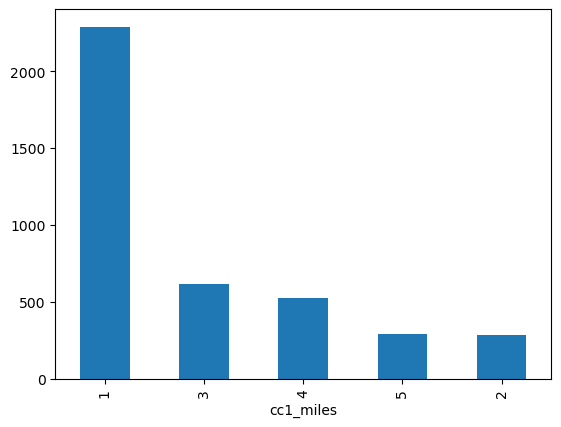

In [9]:
airl['cc1_miles'].value_counts().plot.bar()
plt.xlabel('cc1_miles')
print(airl['cc1_miles'].value_counts())

cc2_miles
1    3956
2      28
3      15
Name: count, dtype: int64


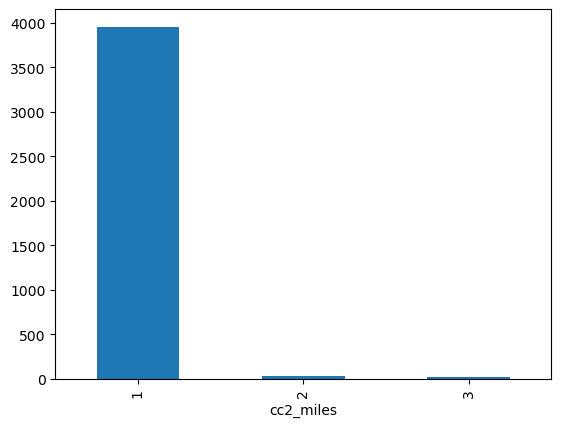

In [10]:
airl['cc2_miles'].value_counts().plot.bar()
plt.xlabel('cc2_miles')
print(airl['cc2_miles'].value_counts())

Award
0    2518
1    1481
Name: count, dtype: int64


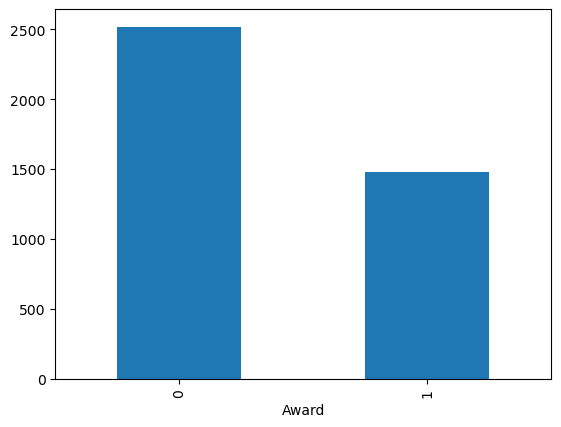

In [11]:
airl['Award'].value_counts().plot.bar()
plt.xlabel('Award')
print(airl['Award'].value_counts())

In [12]:
airl.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


ID


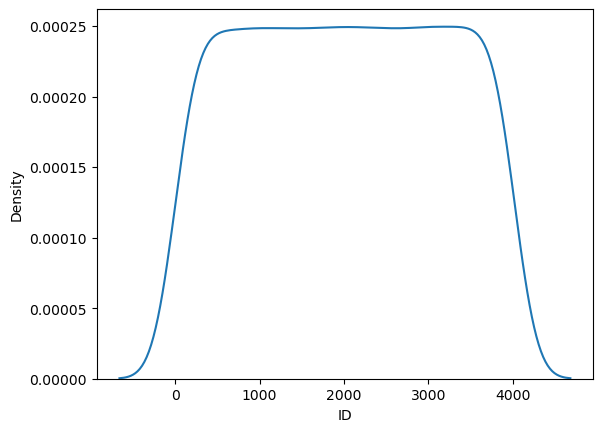

Balance


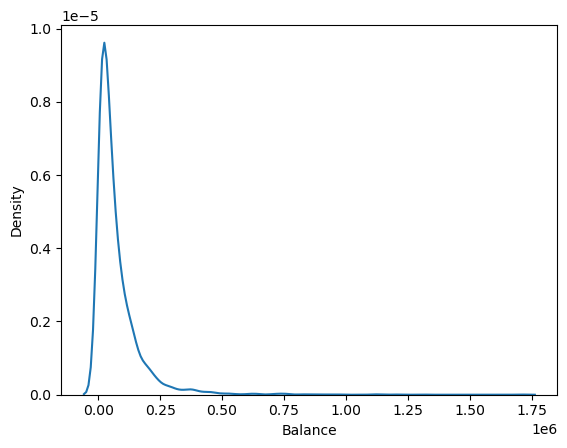

Qual_miles


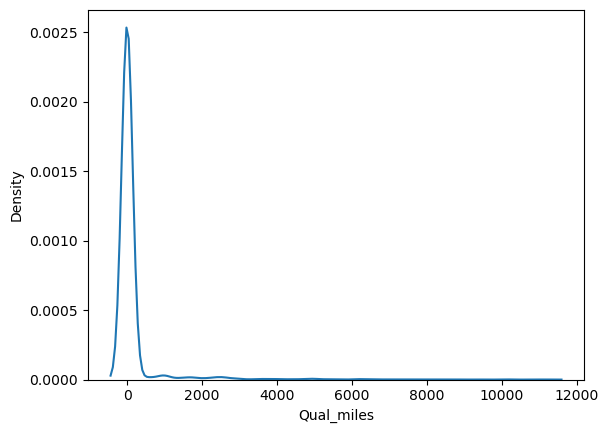

cc1_miles


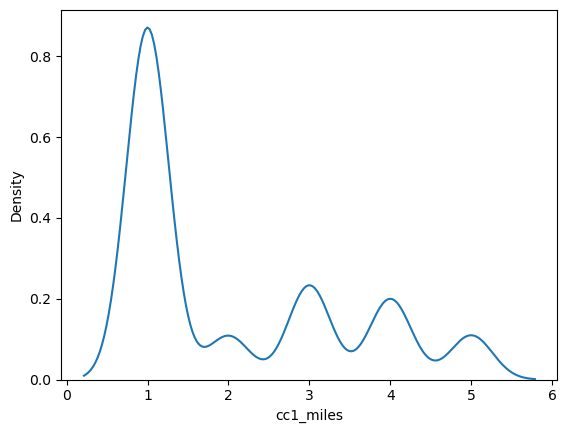

cc2_miles


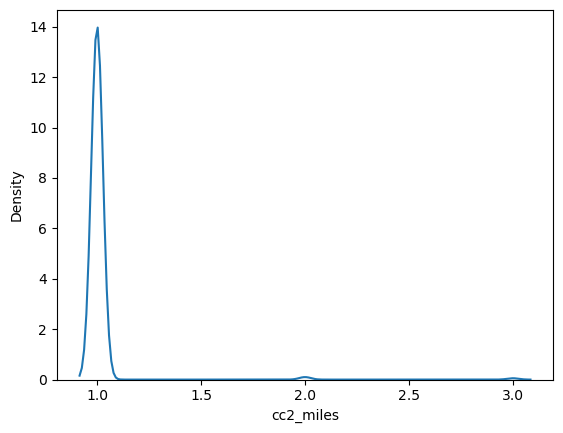

cc3_miles


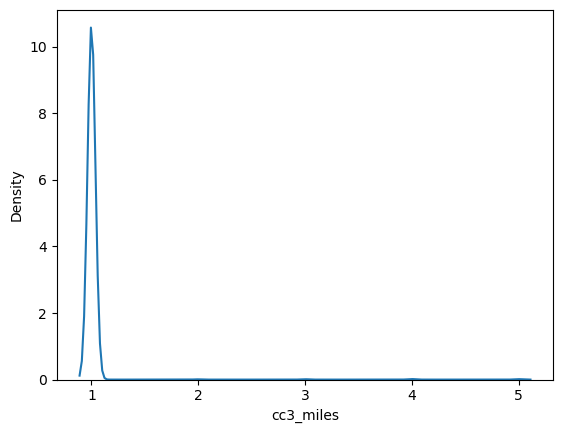

Bonus_miles


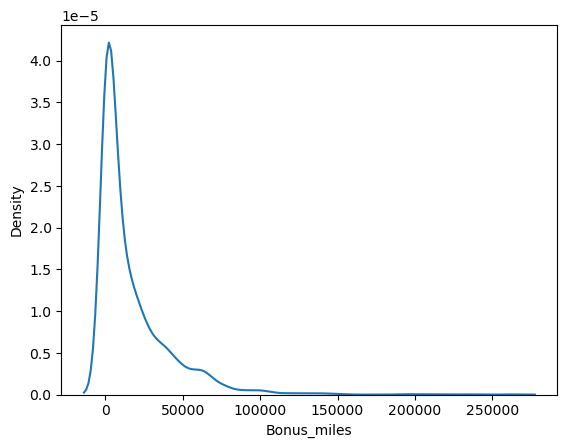

Bonus_trans


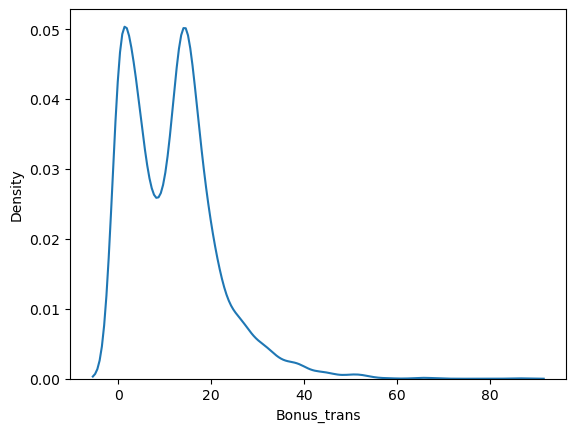

Flight_miles_12mo


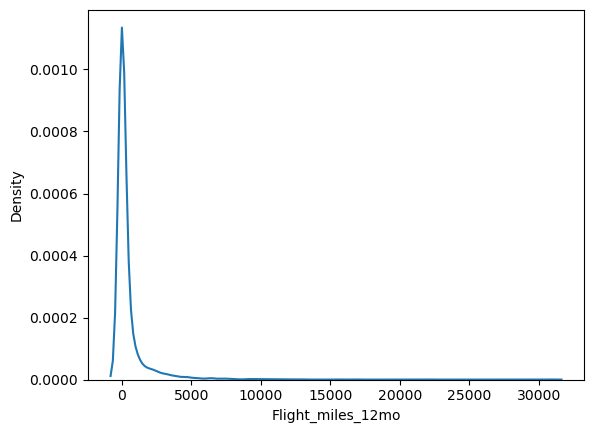

Flight_trans_12


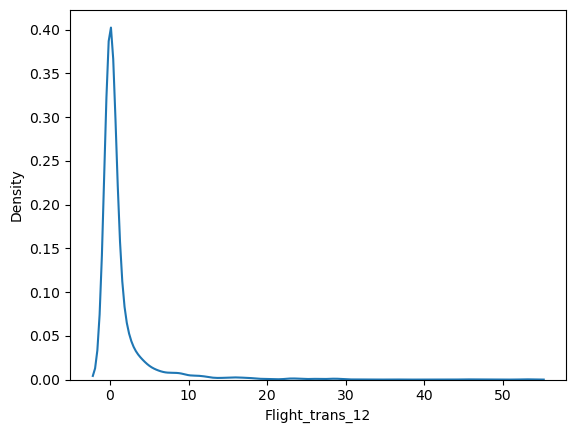

Days_since_enroll


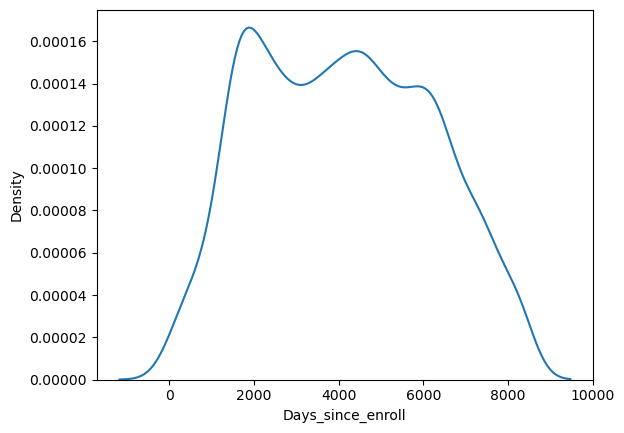

Award


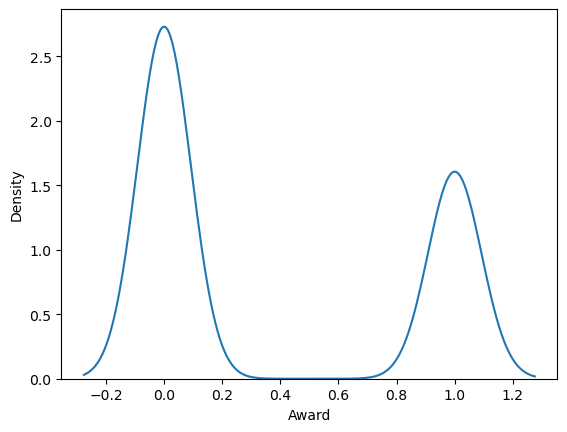

In [13]:
  # Kernel Density for every feature
for n in airl.columns:
    print(n)
    sns.kdeplot(airl[n])
    plt.show()

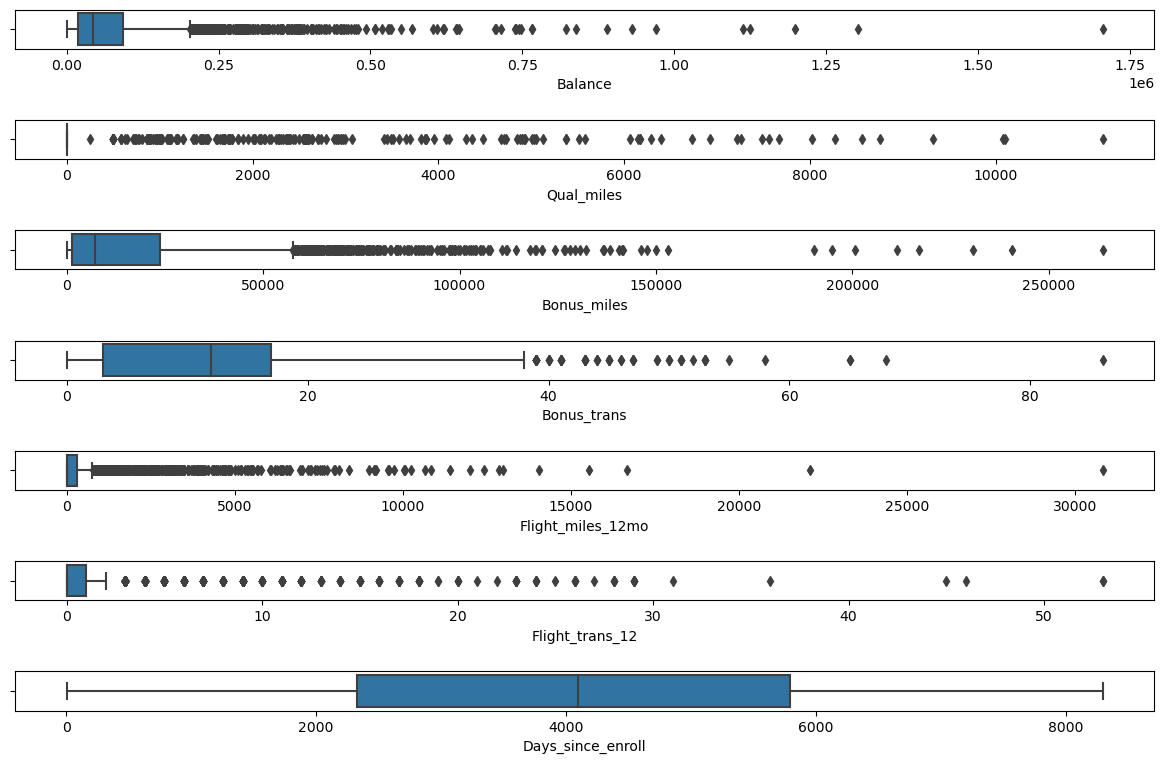

In [14]:
#Outlier
fig, axes=plt.subplots(7,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=airl,ax=axes[0])
sns.boxplot(x='Qual_miles',data=airl,ax=axes[1])
sns.boxplot(x='Bonus_miles',data=airl,ax=axes[2])
sns.boxplot(x='Bonus_trans',data=airl,ax=axes[3])
sns.boxplot(x='Flight_miles_12mo',data=airl,ax=axes[4])
sns.boxplot(x='Flight_trans_12',data=airl,ax=axes[5])
sns.boxplot(x='Days_since_enroll',data=airl,ax=axes[6])
plt.tight_layout(pad=2.0)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


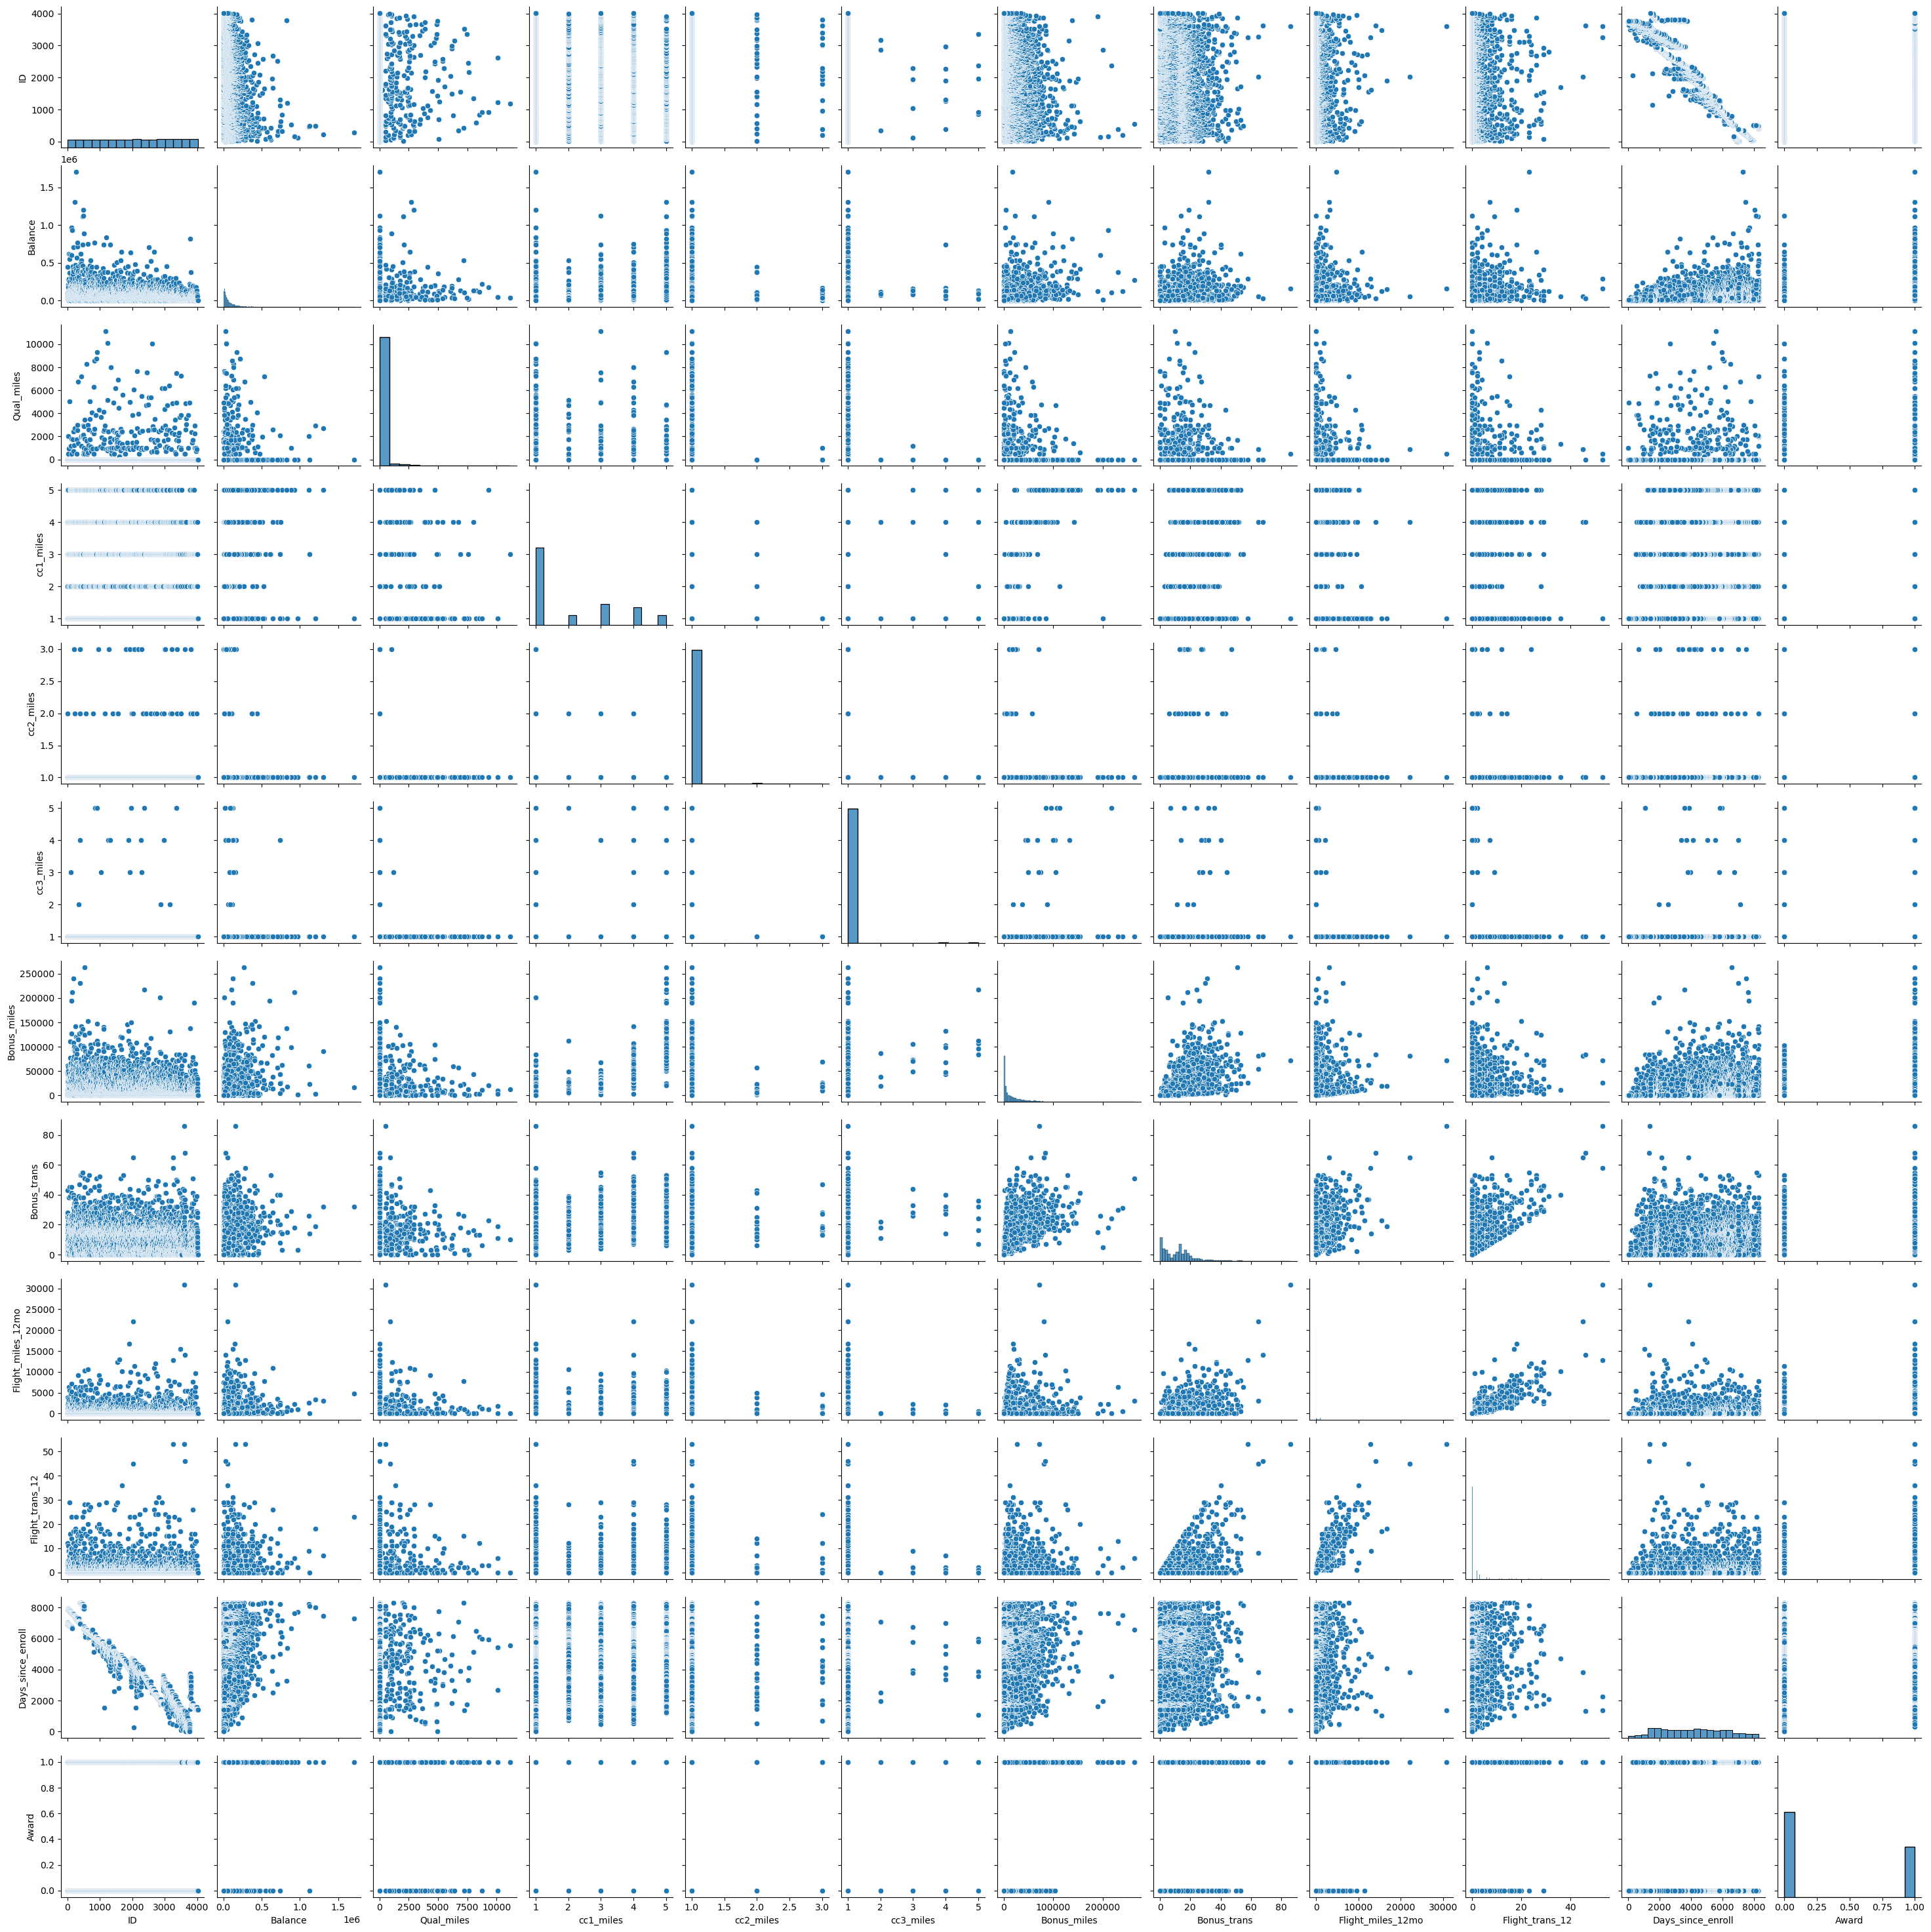

In [15]:
sns.pairplot(airl)

In [16]:
airl.corr()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


There is not so much of colinearity in our data except, for positve corelation
between Bonus_miles - Bonus_trans and Flight_miles_12mo and Flight_trans_12, 
which is obvious as the number of transaction 
would increase the miles rewarded.

##### Hierarchical Clustering

In [17]:
# Normalize the data
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [18]:
airl_norm = norm_fun(airl.iloc[:,1:])
airl_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


###### Single

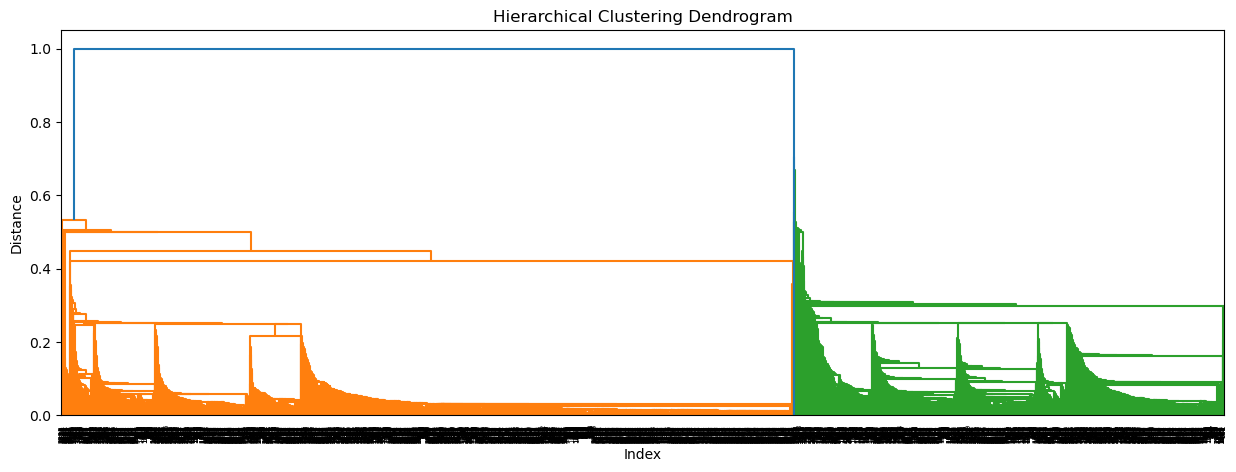

In [19]:
# Apply  Linkage on Normalize data
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating denodrogram
z = linkage(airl_norm,method = "single",metric="euclidean")
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,)
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=6 , linkage='single', affinity='euclidean').fit(airl_norm)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airl['clust']=cluster_labels
airl

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [21]:
airl.clust.value_counts()

clust
2    2516
0    1478
1       2
4       1
3       1
5       1
Name: count, dtype: int64

In [22]:
airl.iloc[:,1:].groupby(airl.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
clust,,,,,,,,,,,,
0,97125.211773,240.345737,2.664411,1.015562,1.015562,28703.769959,15.742219,837.970230,2.566982,4628.257104,1.0,0.0
1,72811.000000,0.000000,1.000000,1.000000,4.500000,65932.500000,10.500000,0.000000,0.000000,2204.000000,0.0,1.0
2,59797.503180,87.672099,1.705882,1.013911,1.005962,10183.408585,9.141892,226.472178,0.653021,3821.937202,0.0,2.0
3,8557.000000,0.000000,1.000000,1.000000,1.000000,200622.000000,5.000000,622.000000,3.000000,1955.000000,1.0,3.0
4,15835.000000,0.000000,2.000000,1.000000,5.000000,112171.000000,16.000000,0.000000,0.000000,5825.000000,1.0,4.0
5,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0,5.0


###### Average

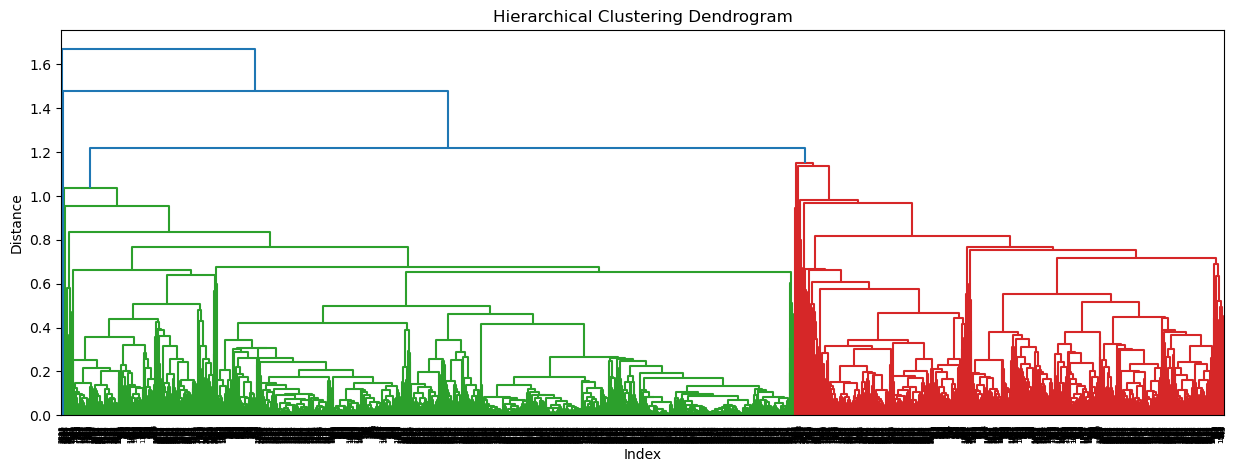

In [23]:
# Apply  Linkage on Normalize data
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating denodrogram
z = linkage(airl_norm,method = "average",metric="euclidean")
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,)
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=7 , linkage='average', affinity='euclidean').fit(airl_norm)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airl2['clust']=cluster_labels
airl2

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [25]:
airl2.iloc[:,1:].groupby(airl2.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
clust,,,,,,,,,,,,
0,9.470821e+04,241.560192,2.647059,1.015732,1.000684,27548.586183,15.493844,797.608071,2.446648,4620.122435,1.0,0.0
1,5.939376e+04,87.846675,1.701712,1.013939,1.000796,10062.361211,9.097172,225.808045,0.651135,3820.078455,0.0,1.0
2,2.083429e+05,0.000000,3.000000,1.000000,3.857143,69533.142857,25.571429,400.000000,1.142857,4026.428571,0.0,2.0
3,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0,3.0
4,7.656512e+04,147.750000,3.875000,1.000000,4.250000,115273.250000,30.250000,600.000000,2.000000,5127.875000,1.0,4.0
5,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.0,5.0
6,4.044688e+05,0.000000,5.000000,1.000000,1.000000,221842.500000,28.500000,2398.833333,6.166667,6331.833333,1.0,6.0


In [26]:
airl2.clust.value_counts()

clust
1    2511
0    1462
4       8
2       7
6       6
3       4
5       1
Name: count, dtype: int64

###### Complete

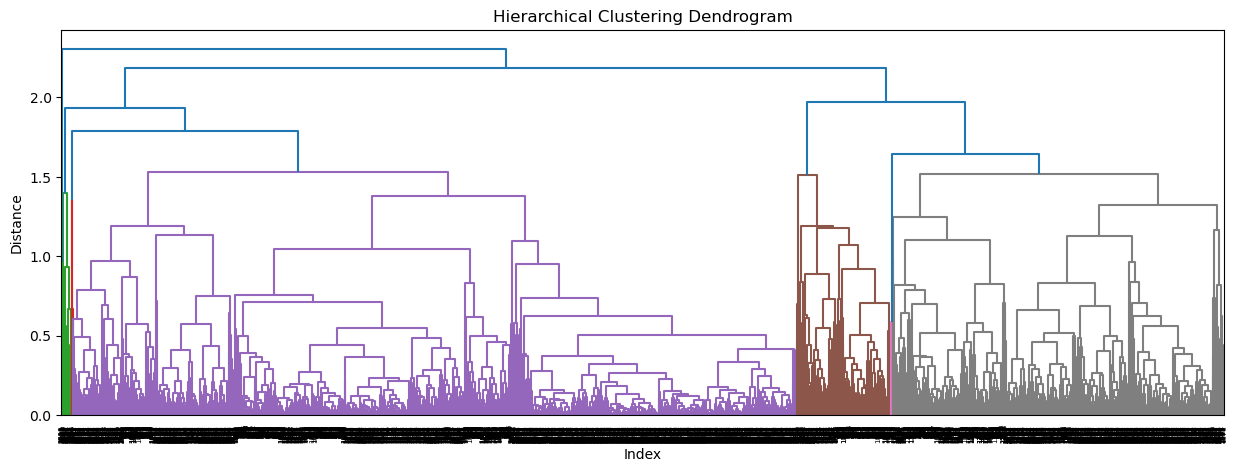

In [27]:
# Apply  Linkage on Normalize data
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating denodrogram
z = linkage(airl_norm,method = "complete",metric="euclidean")
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,)
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=8 , linkage='complete', affinity='euclidean').fit(airl_norm)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airl3['clust']=cluster_labels
airl3

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [29]:
airl3.iloc[:,1:].groupby(airl3.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
clust,,,,,,,,,,,,
0,79918.920175,218.528947,2.098246,1.009649,1.000877,16823.058772,13.392982,740.800877,2.239474,4298.630702,1.000000,0.0
1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000,1.0
2,45074.547804,90.659432,1.187080,1.000000,1.000517,3895.703876,6.797933,230.889406,0.674935,3844.252713,0.000000,2.0
3,111769.618705,81.217626,3.543165,1.001799,1.025180,32007.528777,17.089928,214.537770,0.579137,3756.753597,0.000000,3.0
4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548,4.0
5,64521.000000,295.500000,1.250000,1.000000,4.250000,73273.750000,15.750000,575.000000,2.250000,4242.750000,0.500000,5.0
6,152861.250000,8804.750000,4.000000,1.000000,1.000000,33927.500000,19.000000,500.000000,1.500000,5944.000000,1.000000,6.0
7,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,7.0


#### KMeans

In [30]:
from sklearn.cluster import KMeans

In [31]:
#Standardize the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(airl_kmn)

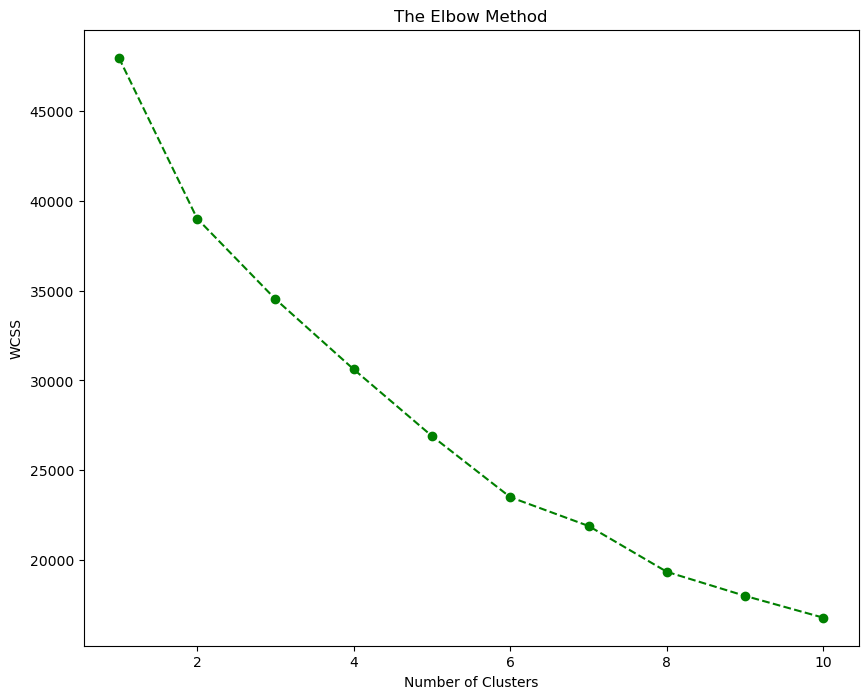

In [32]:
fig = plt.figure(figsize=(10,8))
WCSS = []
for i in range(1,11):
  clf = KMeans(n_clusters=i, random_state = 0)
  clf.fit(std_df)
  WCSS.append(clf.inertia_)
plt.plot(range(1,11),WCSS, 'go--')
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [33]:
clf = KMeans(8, random_state=32)
y_kmeans = clf.fit_predict(std_df)

In [34]:
y_kmeans
#clf.cluster_centers
clf.labels_

array([3, 3, 3, ..., 6, 0, 0])

In [35]:
y_kmeans

array([3, 3, 3, ..., 6, 0, 0])

In [36]:
clf.cluster_centers_

array([[ 9.68092222e-01, -3.92772423e-01, -1.33424409e-01,
        -7.18460499e-01, -9.82418871e-02, -6.27665798e-02,
        -5.80087108e-01, -6.37913275e-01, -1.92568460e-01,
        -2.15879361e-01, -9.64980769e-01, -4.56802069e-01],
       [-9.29901738e-01,  8.75962855e-01, -8.61024945e-02,
         1.53258109e+00, -9.82418871e-02, -6.27665798e-02,
         1.47269212e+00,  8.88861270e-01,  5.78932546e-03,
         2.03691559e-02,  9.32716397e-01,  7.00216392e-01],
       [-1.67649980e-01,  1.10381847e+00,  4.67738550e-01,
         7.17767634e-02, -9.82418871e-02, -6.27665798e-02,
         6.58656881e-01,  1.81007391e+00,  4.08869989e+00,
         4.34863856e+00,  2.08676232e-01,  9.07007646e-01],
       [-8.32015988e-01, -1.64117696e-01, -1.10811262e-01,
        -5.17530859e-01, -9.82418871e-02, -5.85643473e-02,
        -4.73925510e-01, -3.99699656e-01, -1.51188734e-01,
        -1.62526878e-01,  8.09995581e-01, -2.04616429e-01],
       [-3.01522483e-01,  6.39719256e-01, -8.4432923

In [37]:
clf.inertia_

19330.86154694181

In [38]:
md=pd.Series(y_kmeans)
airl_kmn['clust']=md
airl_kmn

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,6
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [39]:
airl_kmn.iloc[:,1:13].groupby(airl_kmn.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
clust,,,,,,,,,,,,
0,34029.387387,40.935299,1.069615,1.000000,1.000000,3134.078624,5.466830,190.609337,0.555283,2124.628174,0.149877,0.0
1,161624.881557,77.377327,4.167513,1.000000,1.000000,52647.020305,20.135364,467.368866,1.448393,6044.465313,0.708968,1.0
2,184825.458333,505.941667,2.158333,1.000000,1.000000,33050.058333,28.983333,6184.375000,17.866667,4549.450000,0.808333,2.0
3,57095.291461,58.442529,1.345649,1.000000,1.000821,5691.192118,7.754516,248.590312,0.757800,5790.910509,0.270936,3.0
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,4.0
5,119547.315789,5534.456140,2.035088,1.000000,1.000000,19299.315789,12.473684,970.473684,2.947368,3966.140351,0.543860,5.0
6,73152.031335,42.316076,3.204360,1.000000,1.002725,26679.318801,17.727520,269.667575,0.824251,3049.678474,0.539510,6.0
7,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,7.0


##### DBSCAN

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [41]:
airl_dbs1=airl_dbs.drop(['ID'],axis=1)

In [42]:
airl_normdb=StandardScaler().fit_transform(airl_dbs1)
airl_normdb

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [43]:
dbscan = DBSCAN(eps = 1, min_samples=8)
dbscan.fit(airl_normdb)

DBSCAN(eps=1, min_samples=8)

In [44]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [45]:
# Adding clusters to dataset
airl_kmn['clusters']=dbscan.labels_
airl_kmn

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,6,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [46]:
airl_kmn.iloc[:,1:13].groupby(airl_kmn.clusters).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
clusters,,,,,,,,,,,,
-1,174568.814062,880.715625,2.667187,1.073438,1.076563,37807.162500,21.151563,2053.550000,5.932812,4707.593750,0.665625,2.815625
0,52629.739206,2.455299,1.655037,1.000000,1.000000,8975.535107,8.412124,112.624945,0.371566,3790.366768,0.000000,1.982556
1,58403.466351,6.659716,2.581043,1.000000,1.000000,22452.773460,12.739336,253.072986,0.798104,4489.313744,1.000000,2.947867
2,28365.363636,0.000000,1.000000,2.000000,1.000000,8825.272727,11.818182,22.727273,0.181818,2702.000000,0.000000,7.000000
